In [24]:
import os

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
sequence_map = {
    'MOT17' : ['MOT17-13-FRCNN', 'MOT17-09-FRCNN', 'MOT17-10-FRCNN',
       'MOT17-11-FRCNN', 'MOT17-04-FRCNN', 'MOT17-05-FRCNN',
       'MOT17-02-FRCNN'],
    'MOT20' : ['MOT20-01', 'MOT20-03', 'MOT20-02', 'MOT20-05']  
}

In [26]:
def get_track_id_per_frame(dataset):
    sequences = sequence_map[dataset]
    final_data = []

    for seq in sequences:
        
        relative_path = f'datasets/{dataset}/train/{seq}/gt/gt.txt'
        absolute_path = os.path.join(os.path.dirname(os.getcwd()), relative_path)

        # Read the ground truth file
        gt = pd.read_csv(absolute_path, header=None)
        for line in gt.values:
            frame_number, track_id = line[0], line[1]
            final_data.append({
                'dataset': dataset,
                'video': seq,
                'frame_number': int(frame_number),
                'track_id': int(track_id)
            })

    return pd.DataFrame(final_data)

mot17_gt = get_track_id_per_frame('MOT17')
mot20_gt = get_track_id_per_frame('MOT20')

mot_gt = pd.concat([mot17_gt, mot20_gt], ignore_index=True)
mot_gt

,dataset,video,frame_number,track_id
0,MOT17,MOT17-13-FRCNN,1,1
1,MOT17,MOT17-13-FRCNN,2,1
2,MOT17,MOT17-13-FRCNN,3,1
3,MOT17,MOT17-13-FRCNN,4,1
4,MOT17,MOT17-13-FRCNN,5,1
...,...,...,...,...
1541616,MOT20,MOT20-05,1444,1211
1541617,MOT20,MOT20-05,1445,1211
1541618,MOT20,MOT20-05,1446,1211
1541619,MOT20,MOT20-05,1447,1211


In [27]:
tracker_count_per_frame = mot_gt.groupby(['dataset', 'video', 'frame_number']).agg({'track_id': 'count'}).reset_index()
tracker_count_per_frame

,dataset,video,frame_number,track_id
0,MOT17,MOT17-02-FRCNN,1,39
1,MOT17,MOT17-02-FRCNN,2,39
2,MOT17,MOT17-02-FRCNN,3,39
3,MOT17,MOT17-02-FRCNN,4,39
4,MOT17,MOT17-02-FRCNN,5,39
...,...,...,...,...
14242,MOT20,MOT20-05,3311,225
14243,MOT20,MOT20-05,3312,226
14244,MOT20,MOT20-05,3313,226
14245,MOT20,MOT20-05,3314,226


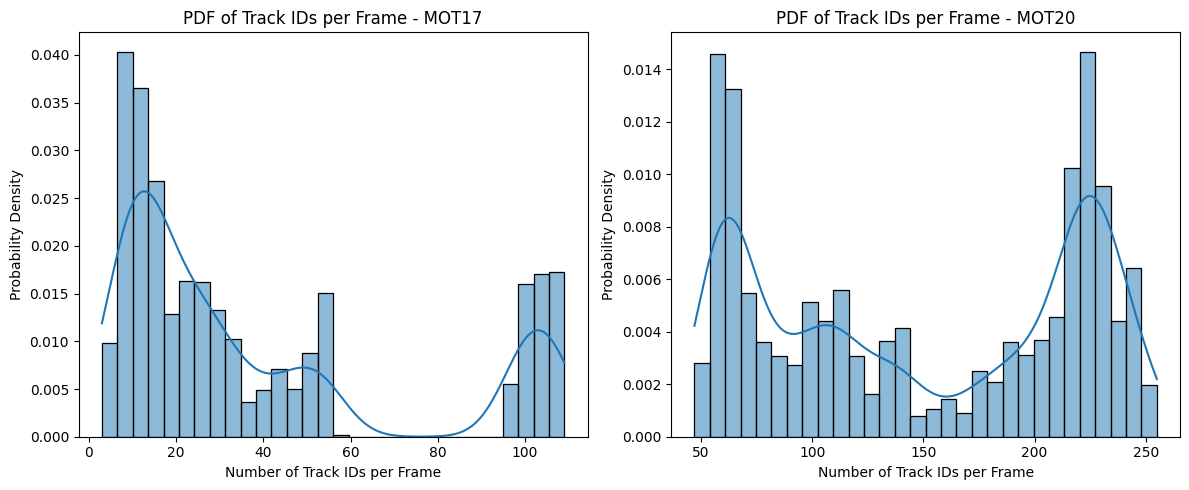

In [ ]:
# Filter for MOT17 and MOT20 datasets
datasets = ["MOT17", "MOT20"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot PDFs for each dataset separately
for i, dataset in enumerate(datasets):
    subset = tracker_count_per_frame[tracker_count_per_frame["dataset"] == dataset]
    
    sns.histplot(
        data=subset,
        x="track_id",
        stat="density",
        bins=30,
        kde=True,
        ax=axes[i]
    )

    
    
    axes[i].set_title(f"PDF of Track IDs per Frame - {dataset.upper()}")
    axes[i].set_xlabel("Number of Track IDs per Frame")
    axes[i].set_ylabel("Probability Density")

plt.tight_layout()
plt.show()

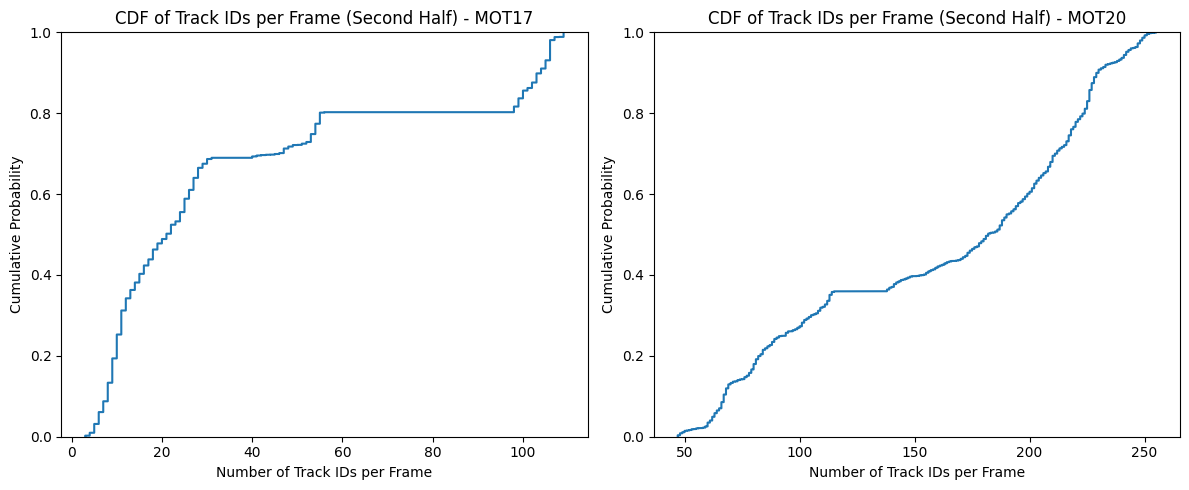

In [32]:
tracker_count_per_frame["max_frame"] = tracker_count_per_frame.groupby("video")["frame_number"].transform("max")
second_half_df = tracker_count_per_frame[tracker_count_per_frame["frame_number"] > tracker_count_per_frame["max_frame"] / 2]

# Filter datasets
datasets = ["MOT17", "MOT20"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot CDF for each dataset
for i, dataset in enumerate(datasets):
    subset = second_half_df[second_half_df["dataset"] == dataset]
    
    sns.ecdfplot(
        data=subset,
        x="track_id",
        ax=axes[i]
    )
    
    axes[i].set_title(f"CDF of Track IDs per Frame (Second Half) - {dataset.upper()}")
    axes[i].set_xlabel("Number of Track IDs per Frame")
    axes[i].set_ylabel("Cumulative Probability")

plt.tight_layout()
plt.show()